In [69]:
import pandas as pd
import numpy as np

# 전처리 완료 데이터 불러오기
data_a = pd.read_csv("./datasets/data_after/전처리_최종_V3_loglag.csv", encoding="CP949")
data_a = data_a.set_index('기준월')

### 기초통계량 분석

In [70]:
# 데이터프레임의 정보
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  인플레이션율       214 non-null    float64
dtypes: float64(12)
memory usage: 21.7+ KB


In [71]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
인플레이션율         0
dtype: int64

In [72]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,0.189481
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,0.352278
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812187,29.270000,-0.462035,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,0.179601
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,1.188525


In [73]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.206792
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.126407
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,0.008612
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.076446
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.101928
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.106716
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,0.010419
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.169978
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.059523
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.060283


### 상관관계 히트맵으로 시각화

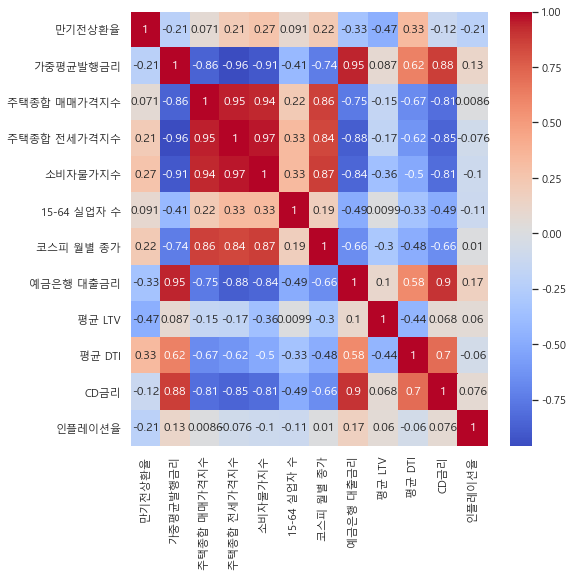

In [74]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(8,8)}) ## 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') ## 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨지는 걸 방지함
plt.show()

In [75]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,30628.069972,소비자물가지수
1,4722.475963,15-64 실업자 수
2,4418.549587,평균 DTI
3,3710.678880,코스피 월별 종가
4,2894.363005,평균 LTV
5,2403.522024,주택종합 전세가격지수
6,1650.702731,주택종합 매매가격지수
7,842.644520,가중평균발행금리
8,632.880134,예금은행 대출금리
9,37.270199,CD금리


### 현재 상관관계가 굉장히 높은 것들 (> |0.7|)
1. 가중평균발행금리 & 금리의 차이
2. 주택종합 매매가격지수 & 주택종합 전세가격지수
3. 소비자 물가지수 & 주택종합 매매가격지수
4. 소비자 물가지수 & 주택종합 전세가격지수
5. 코스피 월별종가 & 주택종합 매매가격지수
6. 코스피 월별종가 & 주택종합 전세가격지수

In [76]:
# # 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정해서 빼기
# data_b = data_a.copy()
# data_b.drop(columns=['예금은행 대출금리', '주택종합 전세가격지수'], inplace=True)

# # 상관관계 재확인
# sns.set(rc={'figure.figsize':(8,8)}) ## 히트맵 크기 설정
# plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정
# sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') ## 히트맵 그리기
# plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨지는 걸 방지함
# plt.show()

### Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씀
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같음 -> 못 씀
- Min-Max : 아웃라이어 살리고 데이터 분포 살림 (-> 남는 게 이거 뿐)

In [77]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

data_c = data_a.copy().reset_index()
scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
0,0.922279,0.023902,0.045411,0.000000,0.270948,0.044228,0.796034,0.779071,0.000000,0.808211,0.702174
1,0.860130,0.021056,0.037775,0.015285,0.411797,0.000000,0.787312,0.738665,0.404489,0.808211,0.834290
2,0.807542,0.016809,0.028379,0.036912,0.377595,0.059141,0.768107,0.717274,0.606252,0.783771,0.385088
3,0.771687,0.014553,0.023740,0.036912,0.247920,0.084785,0.742334,0.732961,0.745031,0.761692,0.385088
4,0.741210,0.011992,0.019409,0.036912,0.286896,0.084586,0.733051,0.752134,0.796137,0.761692,0.073353
...,...,...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.984264,0.932341,0.238626,0.857809,0.413075,0.659152,0.149045,0.350339,0.686548
210,0.010817,0.988598,0.988072,0.946876,0.284627,0.866718,0.419800,0.656930,0.153740,0.384057,0.758501
211,0.005781,0.990610,0.990779,0.964867,0.280079,0.881002,0.410822,0.657576,0.149973,0.384057,0.770460
212,0.000000,0.994898,0.994761,0.983432,0.313914,0.865698,0.424255,0.650819,0.141091,0.423561,0.728874


In [78]:
# Min-Max 스케일링 잘 됐는지 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.444594,0.545529,0.442031,0.608737,0.471166,0.490067,0.619326,0.588164,0.483121
std,0.342226,0.224773,0.291382,0.265811,0.239491,0.191978,0.272720,0.275303,0.253078,0.240071,0.182259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.141727,0.339965,0.272091,0.530060,0.244010,0.295559,0.429185,0.421530,0.350115
50%,0.345682,0.389199,0.475294,0.632525,0.401178,0.655505,0.424255,0.512553,0.674756,0.636004,0.478009
75%,0.844064,0.521072,0.705189,0.766320,0.596864,0.701062,0.714181,0.653614,0.832489,0.764200,0.594392
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 변수 각각 분석

In [79]:
# 최적의 알파값을 찾기 전에 피처랑 타겟 설정
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

## ALL
feature_data = mm_result

## 금리 요인 
feature_data_A = mm_result[['가중평균발행금리', 'CD금리']]

## 부동산 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']]

## 거시경제 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']]

target = data_a['만기전상환율']

## 주요 요인 별로 나눈 이유 -> 각 상관관계가 너무 높아서

In [91]:
# 최적의 알파 찾기
## 80% 수준의 데이터만 가지고 돌렸을 때 최적의 알파값을 찾기 위한 GridSearch 수행

a = 0.01 ## 최초 알파값
alpha_list = [] ## 알파 후보 담을 리스트

## 하이퍼 파라미터 값을 찾아야하므로 아무것도 선언하지 않은 모델 생성
model_test = Ridge()

## alpha_list에 0.01부터 1.00 까지 alpha 후보 100개 저장함
for i in range(0,100):
    a = round(a, 2)
    alpha_list.append(a)
    a += 0.01

## grid search 수행
grid_search = GridSearchCV(model_test, param_grid={'alpha' : alpha_list})
grid_search.fit(feature_data_B[:171], target[:171])

print(grid_search.best_params_) ## best alpha
MSE = np.abs(grid_search.best_score_)
RMSE = np.sqrt(np.abs(MSE))
print(f'MSE : {MSE} | RMSE: {RMSE}')


## feature_data_A 금리 요인 : Ridge -> 1.0,         MSE : 2.460266482322237 | RMSE: 1.5685236632968713
##                          : Lasso -> 0.04,        MSE : 2.4196265663765195 | RMSE: 1.5555148878672038
##                          : ElasticNet -> 0.03,   MSE : 2.3895138330426953 | RMSE: 1.545805237745912

## feature_data_B 부동산 요인 : Ridge -> 1.0,       MSE : 2.5005624420438983 | RMSE: 1.5813166798727882
##                            : Lasso -> 0.03,      MSE : 2.5492022464917574 | RMSE: 1.5966221364154254
##                            : ElasticNet -> 0.02, MSE : 2.1803146833143323 | RMSE: 1.476588867394825

## feature_data_C 거시경제 요인 : Ridge -> 0.27,       MSE : 2.9097815094991355 | RMSE: 1.7058081690211053
##                              : Lasso -> 0.01,      MSE : 2.9182254583805216 | RMSE: 1.708281434184813
##                              : ElasticNet -> 0.01, MSE : 2.9396228429867888 | RMSE: 1.714532835202286


{'alpha': 1.0}
MSE : 2.5005624420438983 | RMSE: 1.5813166798727882


In [92]:
# 전체 VIF after Min-Max Scaling
vif_x = pd.DataFrame()
vif_x["VIF Factor"] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif_x["features"] = feature_data.columns

vif_x = vif_x.sort_values(by="VIF Factor", ascending=False)
vif_x = vif_x.reset_index().drop(columns='index')
vif_x

,VIF Factor,features
0,332.556205,소비자물가지수
1,278.660441,주택종합 전세가격지수
2,179.148186,주택종합 매매가격지수
3,96.753368,예금은행 대출금리
4,81.687957,CD금리
5,78.175387,가중평균발행금리
6,57.618001,코스피 월별 종가
7,33.376724,평균 DTI
8,12.242470,평균 LTV
9,9.061235,인플레이션율


In [93]:
# 금리 요인 VIF after Min-Max Scaling
vif_a = pd.DataFrame()
vif_a["VIF Factor"] = [variance_inflation_factor(feature_data_A.values, i) for i in range(feature_data_A.shape[1])]
vif_a["features"] = feature_data_A.columns

vif_a = vif_a.sort_values(by="VIF Factor", ascending=False)
vif_a = vif_a.reset_index().drop(columns='index')
vif_a

,VIF Factor,features
0,9.382942,가중평균발행금리
1,9.382942,CD금리


In [94]:
# 부동산 요인 VIF after Min-Max Scaling
vif_b = pd.DataFrame()
vif_b["VIF Factor"] = [variance_inflation_factor(feature_data_B.values, i) for i in range(feature_data_B.shape[1])]
vif_b["features"] = feature_data_B.columns

vif_b = vif_b.sort_values(by="VIF Factor", ascending=False)
vif_b = vif_b.reset_index().drop(columns='index')
vif_b

,VIF Factor,features
0,2.659064,평균 LTV
1,2.375083,평균 DTI
2,2.321795,주택종합 매매가격지수


In [95]:
# 거시경제 요인 VIF after Min-Max Scaling
vif_c = pd.DataFrame()
vif_c["VIF Factor"] = [variance_inflation_factor(feature_data_C.values, i) for i in range(feature_data_C.shape[1])]
vif_c["features"] = feature_data_C.columns

vif_c = vif_c.sort_values(by="VIF Factor", ascending=False)
vif_c = vif_c.reset_index().drop(columns='index')
vif_c

,VIF Factor,features
0,7.126936,코스피 월별 종가
1,5.074282,인플레이션율
2,4.078608,15-64 실업자 수


#### 변수 합쳐서 분석

In [96]:
# 최적의 알파값을 찾기 전에 피처링 타겟 설정
mm_result2 = mm_result.copy()

## ALL
feature_data2 = mm_result2

## 금리 요인 
feature_data2_A = mm_result2[['가중평균발행금리', 'CD금리']]

## 금리 요인 + 부동산 요인
feature_data2_B = mm_result2[['가중평균발행금리', 'CD금리', '주택종합 매매가격지수', '평균 LTV', '평균 DTI']]

## 금리 요인 + 부동산 요인 + 거시경제 요인
feature_data2_C = mm_result2[['가중평균발행금리', 'CD금리', '주택종합 매매가격지수', '평균 LTV', '평균 DTI', '15-64 실업자 수', '인플레이션율', '코스피 월별 종가']]

target = data_a['만기전상환율']

## 주요 요인 별로 나눈 이유 -> 각 상관관계가 너무 높아서

In [105]:
# 최적의 알파 찾기
## 80% 수준의 데이터만 가지고 돌렸을 때 최적의 알파값을 찾기 위한 GridSearch 수행

a = 0.01 ## 최초 알파값
alpha_list = [] ## 알파 후보 담을 리스트

## 하이퍼 파라미터 값을 찾아야하므로 아무것도 선언하지 않은 모델 생성
model_test = Ridge()

## alpha_list에 0.01부터 1.00 까지 alpha 후보 100개 저장함
for i in range(0,100):
    a = round(a, 2)
    alpha_list.append(a)
    a += 0.01

## grid search 수행
grid_search = GridSearchCV(model_test, param_grid={'alpha' : alpha_list})
grid_search.fit(feature_data2_A[:171], target[:171])

print(grid_search.best_params_) ## best alpha
MSE = np.abs(grid_search.best_score_)
RMSE = np.sqrt(np.abs(MSE))
print(f'MSE : {MSE} | RMSE: {RMSE}')


## feature_data2_A 금리 요인 : Ridge -> 1.0,         MSE : 2.460266482322237 | RMSE: 1.5685236632968713
##                          : Lasso -> 0.04,        MSE : 2.4196265663765195 | RMSE: 1.5555148878672038
##                          : ElasticNet -> 0.03,   MSE : 2.3895138330426953 | RMSE: 1.545805237745912

## feature_data2_B 금리 + 부동산 요인 : Ridge -> 1.0,       MSE : 2.948812359381477 | RMSE: 1.7172106333765456
##                                   : Lasso -> 0.04,      MSE : 1.8207760754372644 | RMSE: 1.3493613583607855
##                                   : ElasticNet -> 0.05, MSE : 1.8264367735133937 | RMSE: 1.3514572777240847

## feature_data2_C 금리 + 부동산 + 거시경제 요인 : Ridge -> 1.0,       MSE : 3.174472149882928 | RMSE: 1.781704843649174
##                                              : Lasso -> 0.05,      MSE : 1.9569946792279302 | RMSE: 1.3989262593960878
##                                              : ElasticNet -> 0.05, MSE : 1.9874968142409188 | RMSE: 1.4097860881144058

{'alpha': 1.0}
MSE : 2.460266482322237 | RMSE: 1.5685236632968713


In [106]:
# 변수 각각 분석
## feature_data_A 금리 요인 : Ridge -> 1.0,         MSE : 2.460266482322237 | RMSE: 1.5685236632968713
##                          : Lasso -> 0.04,        MSE : 2.4196265663765195 | RMSE: 1.5555148878672038
##                          : ElasticNet -> 0.03,   MSE : 2.3895138330426953 | RMSE: 1.545805237745912

## feature_data_B 부동산 요인 : Ridge -> 1.0,       MSE : 2.5005624420438983 | RMSE: 1.5813166798727882
##                            : Lasso -> 0.03,      MSE : 2.5492022464917574 | RMSE: 1.5966221364154254
##                            : ElasticNet -> 0.02, MSE : 2.1803146833143323 | RMSE: 1.476588867394825

## feature_data_C 거시경제 요인 : Ridge -> 0.27,       MSE : 2.9097815094991355 | RMSE: 1.7058081690211053
##                              : Lasso -> 0.01,      MSE : 2.9182254583805216 | RMSE: 1.708281434184813
##                              : ElasticNet -> 0.01, MSE : 2.9396228429867888 | RMSE: 1.714532835202286


In [107]:
# 전체 VIF after Min-Max Scaling
vif_2x = pd.DataFrame()
vif_2x["VIF Factor"] = [variance_inflation_factor(feature_data2.values, i) for i in range(feature_data2.shape[1])]
vif_2x["features"] = feature_data2.columns

vif_2x = vif_2x.sort_values(by="VIF Factor", ascending=False)
vif_2x = vif_2x.reset_index().drop(columns='index')
vif_2x

,VIF Factor,features
0,332.556205,소비자물가지수
1,278.660441,주택종합 전세가격지수
2,179.148186,주택종합 매매가격지수
3,96.753368,예금은행 대출금리
4,81.687957,CD금리
5,78.175387,가중평균발행금리
6,57.618001,코스피 월별 종가
7,33.376724,평균 DTI
8,12.242470,평균 LTV
9,9.061235,인플레이션율


In [108]:
# 금리 요인 VIF after Min-Max Scaling
vif_2a = pd.DataFrame()
vif_2a["VIF Factor"] = [variance_inflation_factor(feature_data2_A.values, i) for i in range(feature_data2_A.shape[1])]
vif_2a["features"] = feature_data2_A.columns

vif_2a = vif_2a.sort_values(by="VIF Factor", ascending=False)
vif_2a = vif_2a.reset_index().drop(columns='index')
vif_2a

,VIF Factor,features
0,9.382942,가중평균발행금리
1,9.382942,CD금리


In [109]:
# 금리 + 부동산 요인 VIF after Min-Max Scaling
vif_2b = pd.DataFrame()
vif_2b["VIF Factor"] = [variance_inflation_factor(feature_data2_B.values, i) for i in range(feature_data2_B.shape[1])]
vif_2b["features"] = feature_data2_B.columns

vif_2b = vif_2b.sort_values(by="VIF Factor", ascending=False)
vif_2b = vif_2b.reset_index().drop(columns='index')
vif_2b

,VIF Factor,features
0,42.745666,CD금리
1,17.953013,평균 DTI
2,16.382859,가중평균발행금리
3,5.215353,평균 LTV
4,4.180989,주택종합 매매가격지수


In [110]:
# 금리 + 부동산 + 거시경제 요인 VIF after Min-Max Scaling
vif_2c = pd.DataFrame()
vif_2c["VIF Factor"] = [variance_inflation_factor(feature_data2_C.values, i) for i in range(feature_data2_C.shape[1])]
vif_2c["features"] = feature_data2_C.columns

vif_2c = vif_2c.sort_values(by="VIF Factor", ascending=False)
vif_2c = vif_2c.reset_index().drop(columns='index')
vif_2c

,VIF Factor,features
0,47.184094,CD금리
1,46.428118,코스피 월별 종가
2,28.889138,주택종합 매매가격지수
3,21.410019,평균 DTI
4,17.702737,가중평균발행금리
5,8.658782,인플레이션율
6,6.307291,평균 LTV
7,4.908142,15-64 실업자 수


In [111]:
# 변수 각각 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# type = 'lasso', 'ridge', 'elastic'

print('금리 요인')
tp.score_checker('ridge', feature_data_A[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data_A[:171], target[:171], 0.04)
tp.score_checker('elastic', feature_data_A[:171], target[:171], 0.03)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data_B[:171], target[:171], 0.03)
tp.score_checker('elastic', feature_data_B[:171], target[:171], 0.02)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C[:171], target[:171], 0.27)
tp.score_checker('lasso', feature_data_C[:171], target[:171], 0.01)
tp.score_checker('elastic', feature_data_C[:171], target[:171], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

# 변수 각각 분석
## feature_data_A 금리 요인 : Ridge -> 1.0,         MSE : 2.460266482322237 | RMSE: 1.5685236632968713
##                          : Lasso -> 0.04,        MSE : 2.4196265663765195 | RMSE: 1.5555148878672038
##                          : ElasticNet -> 0.03,   MSE : 2.3895138330426953 | RMSE: 1.545805237745912

## feature_data_B 부동산 요인 : Ridge -> 1.0,       MSE : 2.5005624420438983 | RMSE: 1.5813166798727882
##                            : Lasso -> 0.03,      MSE : 2.5492022464917574 | RMSE: 1.5966221364154254
##                            : ElasticNet -> 0.02, MSE : 2.1803146833143323 | RMSE: 1.476588867394825

## feature_data_C 거시경제 요인 : Ridge -> 0.27,       MSE : 2.9097815094991355 | RMSE: 1.7058081690211053
##                              : Lasso -> 0.01,      MSE : 2.9182254583805216 | RMSE: 1.708281434184813
##                              : ElasticNet -> 0.01, MSE : 2.9396228429867888 | RMSE: 1.714532835202286


금리 요인
Alpha : 1.0
Ridge Negative MSE score : [0.876 0.246 0.763 5.433 6.976]
Ridge RMSE scores : [0.936 0.496 0.873 2.331 2.641]
Ridge AVG RMSE : 1.455

Alpha : 0.04
Lasso Negative MSE score : [1.012 0.391 0.738 5.763 5.279]
Lasso RMSE scores : [1.006 0.625 0.859 2.401 2.298]
Lasso AVG RMSE : 1.438

Alpha : 0.03
Elastic Negative MSE score : [1.006 0.386 0.734 5.658 5.237]
Elastic RMSE scores : [1.003 0.621 0.857 2.379 2.288]
Elastic AVG RMSE : 1.430

부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.361 1.35  0.292 5.486 2.908]
Ridge RMSE scores : [0.601 1.162 0.54  2.342 1.705]
Ridge AVG RMSE : 1.270

Alpha : 0.03
Lasso Negative MSE score : [0.331 1.3   0.294 5.985 3.403]
Lasso RMSE scores : [0.575 1.14  0.542 2.446 1.845]
Lasso AVG RMSE : 1.310

Alpha : 0.02
Elastic Negative MSE score : [0.285 1.296 0.305 5.799 1.912]
Elastic RMSE scores : [0.534 1.138 0.552 2.408 1.383]
Elastic AVG RMSE : 1.203

거시경제 요인
Alpha : 0.27
Ridge Negative MSE score : [0.435 1.185 0.581 5.608 4.735]
Ridge RM

In [112]:
# 변수 합한 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# type = 'lasso', 'ridge', 'elastic'

print('금리 요인')
tp.score_checker('ridge', feature_data2_A[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data2_A[:171], target[:171], 0.04)
tp.score_checker('elastic', feature_data2_A[:171], target[:171], 0.03)

print('\n금리+부동산 요인\n')
tp.score_checker('ridge', feature_data2_B[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data2_B[:171], target[:171], 0.04)
tp.score_checker('elastic', feature_data2_B[:171], target[:171], 0.05)

print('\n금리+부동산+거시경제 요인')
tp.score_checker('ridge', feature_data2_C[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data2_C[:171], target[:171], 0.05)
tp.score_checker('elastic', feature_data2_C[:171], target[:171], 0.05)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

## 변수 합한 요인 데이터
## feature_data2_A 금리 요인 : Ridge -> 1.0,         MSE : 2.460266482322237 | RMSE: 1.5685236632968713
##                          : Lasso -> 0.04,        MSE : 2.4196265663765195 | RMSE: 1.5555148878672038
##                          : ElasticNet -> 0.03,   MSE : 2.3895138330426953 | RMSE: 1.545805237745912

## feature_data2_B 금리 + 부동산 요인 : Ridge -> 1.0,       MSE : 2.948812359381477 | RMSE: 1.7172106333765456
##                                   : Lasso -> 0.04,      MSE : 1.8207760754372644 | RMSE: 1.3493613583607855
##                                   : ElasticNet -> 0.05, MSE : 1.8264367735133937 | RMSE: 1.3514572777240847

## feature_data2_C 금리 + 부동산 + 거시경제 요인 : Ridge -> 1.0,       MSE : 3.174472149882928 | RMSE: 1.781704843649174
##                                              : Lasso -> 0.05,      MSE : 1.9569946792279302 | RMSE: 1.3989262593960878
##                                              : ElasticNet -> 0.05, MSE : 1.9874968142409188 | RMSE: 1.4097860881144058

금리 요인
Alpha : 1.0
Ridge Negative MSE score : [0.876 0.246 0.763 5.433 6.976]
Ridge RMSE scores : [0.936 0.496 0.873 2.331 2.641]
Ridge AVG RMSE : 1.455

Alpha : 0.04
Lasso Negative MSE score : [1.012 0.391 0.738 5.763 5.279]
Lasso RMSE scores : [1.006 0.625 0.859 2.401 2.298]
Lasso AVG RMSE : 1.438

Alpha : 0.03
Elastic Negative MSE score : [1.006 0.386 0.734 5.658 5.237]
Elastic RMSE scores : [1.003 0.621 0.857 2.379 2.288]
Elastic AVG RMSE : 1.430

금리+부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.88  0.592 0.231 4.723 8.75 ]
Ridge RMSE scores : [0.938 0.769 0.48  2.173 2.958]
Ridge AVG RMSE : 1.464

Alpha : 0.04
Lasso Negative MSE score : [0.631 0.442 0.323 5.553 4.856]
Lasso RMSE scores : [0.794 0.665 0.568 2.356 2.204]
Lasso AVG RMSE : 1.318

Alpha : 0.05
Elastic Negative MSE score : [0.634 0.613 0.27  5.584 3.865]
Elastic RMSE scores : [0.796 0.783 0.519 2.363 1.966]
Elastic AVG RMSE : 1.285

금리+부동산+거시경제 요인
Alpha : 1.0
Ridge Negative MSE score : [0.883 0.605 0.224 4.668 9.736]

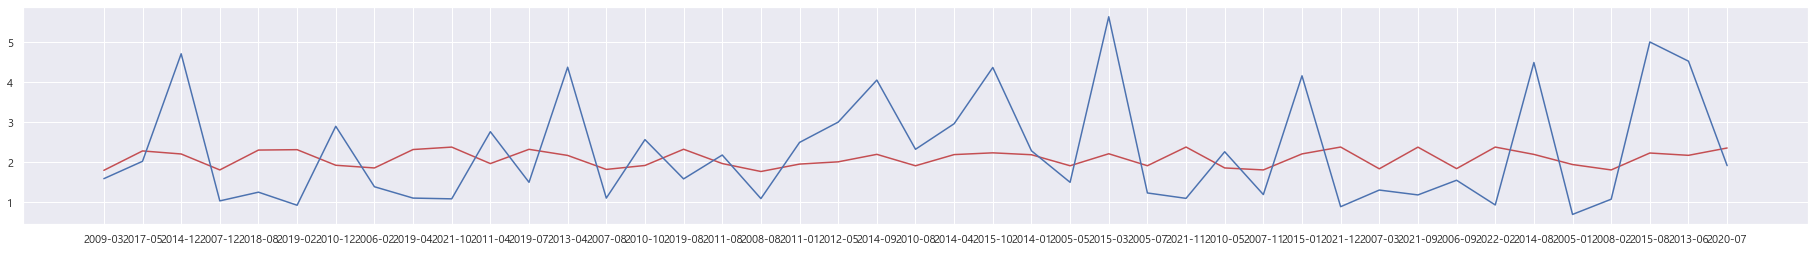

In [113]:
# length -> 214 (60% 0~128, 20% 129~171, 20% 172~214)
## 변수 각각 요인 데이터
# feature_data_A : 금리 요인 (alpha = 0.03)
# feature_data_B : 부동산 요인 (alpha = 0.02)
# feature_data_C : 거시경제 요인 (alpha = 0.01)

## 변수 합한 요인 데이터
# feature_data2_A : 금리 요인 (alpha = 0.03)
# feature_data2_B : 금리 + 부동산 요인 (alpha = 0.02)
# feature_data2_C : 금리 + 부동산 + 거시경제 요인 (alpha = 0.01)


x_train, x_test, y_train, y_test = train_test_split(feature_data_A, target, test_size=0.2, random_state=25)

p_model = ElasticNet(alpha=0.03, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()